# Úkol č. 4 - regrese (do 2. ledna)

  * Cílem tohoto úkolu je vyzkoušet si řešit regresní problém na reálných (ale celkem vyčištěných) datech.
  
> **Nejdůležitější na úkolu je to, abyste udělali vše procesně správně: korektní rozdělení datasetu, ladění hyperparametrů, vyhodnocení výsledků atp.**

## Dataset

  * Zdrojem dat je list *Data* v souboru `Residential-Building-Data-Set.xlsx` na course pages (originál zde: https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set#).
  * Popis datasetu najdete na listu *Descriptions* ve stejném souboru.
  

## Pokyny k vypracování

  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat a příp. vyhoďte nezajímavé příznaky.
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
    * K měření chyby použijte `mean_absolute_error`.
    * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
    * Experimentujte se standardizací/normalizací dat.
    * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
  1. Použijte i jiný model než jen lineární a hřebenovou regresi.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte pouze tento Jupyter Notebook, opravujíví by neměl nic jiného potřebovat.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [41]:
# odtud už je to Vaše
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

np.set_printoptions(precision=3, suppress=True)
mae_last = 0,0

### Načtení datasetu

In [30]:
df = pd.read_excel('Residential-Building-Data-Set.xlsx', header=1, parse_dates=True)
df

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.00,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.00,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.00,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.00,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.00,1734973.5,5500,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,83,4,86,1,20,1350.0,350.0,108.0,80,251.37,...,1176.50,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9,1100,150
368,81,2,82,4,20,600.0,150.0,36.0,60,299.55,...,815.50,1755.00,8013.0,62.78,56.45,3387.72,10646.75,606524.2,740,80
369,84,4,86,3,20,1900.0,430.0,285.0,150,364.41,...,1584.30,8776.71,8799.0,101.00,101.89,13571.80,34474.50,1067772.0,860,220
370,82,3,84,4,20,510.0,160.0,30.6,60,245.28,...,909.20,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3,1100,110


### Ověření, že je dataset bez chyb

In [31]:
df[df.isna().any(axis=1)]


,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10


### Experimentace s parametry

Bylo provedeno několik možností úpravy dat, zkoušel jsem one hot encodovat sloupec s zip kódem. Bez větších zlepšení, spíš se to zhoršilo. Všechny zakomentované sloupce jsem zkoušel vyhodit z datasetu, kvůli redukci dimenze, některé pomohly, jiné ne.

In [32]:
def one_hot_encoding(df:pd.DataFrame, col)-> pd.DataFrame:
    enc = OneHotEncoder(categories='auto')
    enc.fit(df[[col]])
    encoded_arr = enc.transform(df[[col]]).toarray()
    return df.assign(**{str(i):encoded_arr[:, i] for i in range(len(encoded_arr[0]))})

In [33]:
df = pd.read_excel('Residential-Building-Data-Set.xlsx', header=1, parse_dates=True)
df['End'] = (df['COMPLETION YEAR']+df['COMPLETION QUARTER']/4)
# df = one_hot_encoding(df, 'V-1')
df.drop(columns=[
    'START YEAR',
    'COMPLETION YEAR',
    'START QUARTER',
    'COMPLETION QUARTER',
    'V-4', 'V-6',  # saying almost the same, might be linearly dependent
    #'V-14', 'V-14.2', 'V-14.4',
    #'V-1',
    #'V-18',
    'V-19', 'V-19.1', 'V-19.2', 'V-19.3', 'V-19.4',  # duplicate column according to excel sheet
    #'V-21',
    #'V-22',
    #'V-24', 'V-24.1', 'V-24.2', 'V-24.3', 'V-24.4',
    #'V-28', 'V-28.2', 'V-28.4',
    'V-29', 'V-29.1', 'V-29.2', 'V-29.3', 'V-29.4'
], axis=1, inplace=True)

### Rozdělení datasetu

Dataset byl rozdělen na trénovací a testovací data. Jako validace pro ladění hyperparametrů byla použita testovací množina. Hyperparametry jsem ladil ručně, protože LinReg nemá toho moc co nabídnout.

In [34]:
X, X_test, Y, Y_test = train_test_split(df.drop(columns = ['V-9', 'V-10']), df[['V-9', 'V-10']], test_size=0.25, random_state=42)
print('Train X shape', X.shape)
print('Test X shape', X_test.shape)


Train X shape (279, 92)
Test X shape (93, 92)


### Lineární regrese

Model lineární regrese. Zkoušel jsem normalizaci dat, nicméně přineslo to horší výsledky. Takže jako reprezentant na odevzdání zůstal základní model

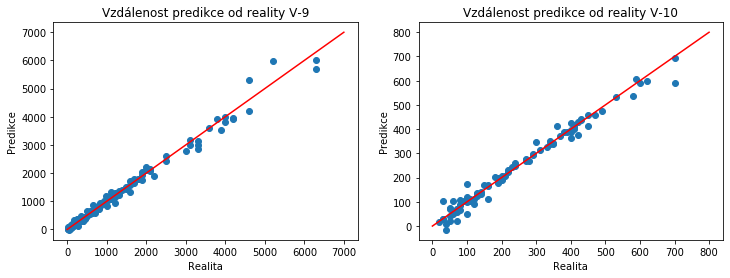

MAE V-9: 120.9778488871058
MAE V-10: 16.11972299663969
change 9: 1.4025803370820853 
      10: 0.16462047916090228


In [61]:
clf = LinearRegression()
clf.fit(X,Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
Yth = clf.predict(X_test)
ax1.set_title("Vzdálenost predikce od reality V-9")
ax1.set_xlabel('Realita')
ax1.set_ylabel('Predikce')
ax1.scatter(Y_test, Yth)
ax1.plot([0,7000], [0,7000], 'r')
ax2.set_title("Vzdálenost predikce od reality V-10")
ax2.set_xlabel('Realita')
ax2.set_ylabel('Predikce')
ax2.scatter(np.array(Y_test)[:, 1], Yth[:, 1])
ax2.plot([0,800], [0,800], 'r')
plt.show()

mae_9 = mean_absolute_error(Yth[:,0], np.array(Y_test)[:,0])
mae_10 = mean_absolute_error(Yth[:,1], np.array(Y_test)[:,1])
print('MAE V-9:', mae_9)
print('MAE V-10:', mae_10)
print('change 9:', mae_9 - mae_last[0], '\n      10:', mae_10 - mae_last[1])
mae_last = mae_9, mae_10

### Hřebenová lineární regrese

Použil jsem kód z cvičení 08 na nalezení optimální alfy. Žádná změna hyperparametrů nebyla co k čemu, takže jediné co jsem měnil byla nalezená alfa.

Optimal alpha 60.67034159226428


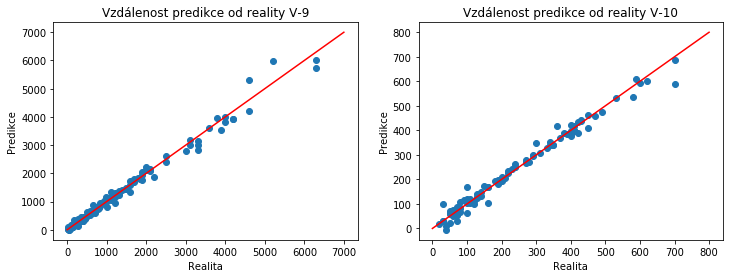

MAE V-9: 119.57526855002371
MAE V-10: 15.955102517478789
change 9: -289.1211372372604 
      10: -25.515551425394673
MAE: 67.76518553375125


In [65]:
from sklearn.linear_model import Ridge
from sklearn import model_selection, metrics
from scipy import optimize

def get_ridge_clf(X, Y):
    def ridgemodel(alpha):
        clf = Ridge(alpha=alpha)
        return -np.mean(model_selection.cross_val_score(clf, X, Y, cv=5, scoring='neg_mean_absolute_error'))

    # Find Ridge alpha automatically
    opt_alpha = optimize.minimize_scalar(ridgemodel, options = {'maxiter': 100}, method = 'bounded', bounds=(0.1, 4000))
    print('Optimal alpha', opt_alpha.x)
    clf = Ridge(alpha = opt_alpha.x)
    clf.fit(X,Y)
    return clf

clf = get_ridge_clf(X,Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
Yth = clf.predict(X_test)
ax1.set_title("Vzdálenost predikce od reality V-9")
ax1.set_xlabel('Realita')
ax1.set_ylabel('Predikce')
ax1.scatter(Y_test, Yth)
ax1.plot([0,7000], [0,7000], 'r')
ax2.set_title("Vzdálenost predikce od reality V-10")
ax2.set_xlabel('Realita')
ax2.set_ylabel('Predikce')
ax2.scatter(np.array(Y_test)[:, 1], Yth[:, 1])
ax2.plot([0,800], [0,800], 'r')
plt.show()
mae_9 = mean_absolute_error(Yth[:,0], np.array(Y_test)[:,0])
mae_10 = mean_absolute_error(Yth[:,1], np.array(Y_test)[:,1])
print('MAE V-9:', mae_9)
print('MAE V-10:', mae_10)
print('change 9:', mae_9 - mae_last[0], '\n      10:', mae_10 - mae_last[1])
mae_last = mae_9, mae_10

print('MAE:', mean_absolute_error(Yth, np.array(Y_test)))

### Standardizace příznaků

Zkoušel jsem použít příznaky, které byly standardizovány. Výsledná hřebenová regrese se na datasetu chovala hůře než na originálu. Proto kdybych měl exportovat model, použil bych model hřebenové regrese bez žádných dalších úprav.

Optimal alpha 1.1347627515143512


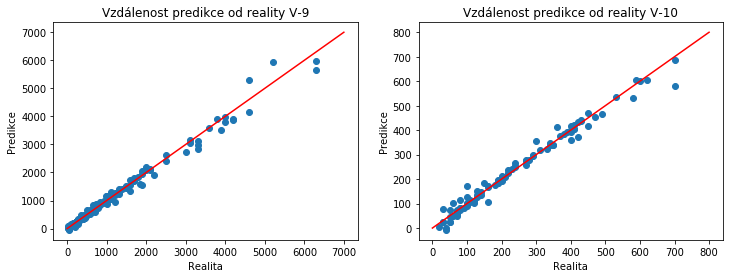

MAE V-9: 122.19275480739469
MAE V-10: 16.15266467975142
change 9: 2.6174862573709845 
      10: 0.19756216227263224
MAE: 69.17270974357305


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X2 = scaler.transform(X)
X2_test = scaler.transform(X_test)

clf = get_ridge_clf(X2,Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
Yth = clf.predict(X2_test)
ax1.set_title("Vzdálenost predikce od reality V-9")
ax1.set_xlabel('Realita')
ax1.set_ylabel('Predikce')
ax1.scatter(Y_test, Yth)
ax1.plot([0,7000], [0,7000], 'r')
ax2.set_title("Vzdálenost predikce od reality V-10")
ax2.set_xlabel('Realita')
ax2.set_ylabel('Predikce')
ax2.scatter(np.array(Y_test)[:, 1], Yth[:, 1])
ax2.plot([0,800], [0,800], 'r')
plt.show()
mae_9 = mean_absolute_error(Yth[:,0], np.array(Y_test)[:,0])
mae_10 = mean_absolute_error(Yth[:,1], np.array(Y_test)[:,1])
print('MAE V-9:', mae_9)
print('MAE V-10:', mae_10)
print('change 9:', mae_9 - mae_last[0], '\n      10:', mae_10 - mae_last[1])
mae_last = mae_9, mae_10

print('MAE:', mean_absolute_error(Yth, np.array(Y_test)))

### Náhodný les

Pro srovnání jsem zkusil predikovat pomocí náhodného lesu. Výsledky byly řádově horší než u lineární regrese proto tento model bych nepoužil pro predikci

70
{'n_estimators': 205, 'max_depth': 16}


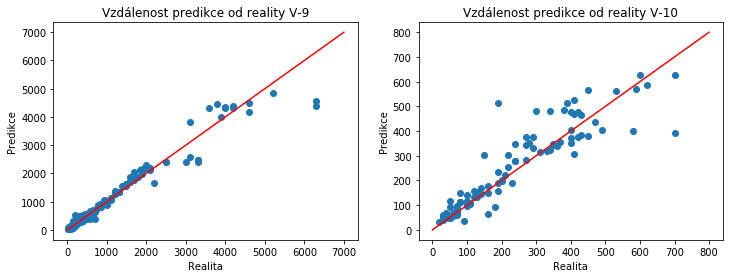

MAE V-9: 186.52111198531335
MAE V-10: 48.03933910306846
change 9: 64.32835717791866 
      10: 31.886674423317036
MAE: 117.2802255441909


In [67]:
rd_seed = 42
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=rd_seed)
param_grid = {
    'n_estimators': range(100,250,15),
    'max_depth': range(1, 20, 3),
}
from sklearn.model_selection import ParameterGrid
param_comb = ParameterGrid(param_grid)
print(len(param_comb))
val_acc = []
for i, params in enumerate(param_comb):
    if i in {len(param_comb)//10*i for i in range(10)}:
        print(f'{i/len(param_comb)*100}%', end='\r')
    dt = RandomForestRegressor(**params, random_state=333, n_jobs=-1, warm_start=True, bootstrap=True)
    dt.fit(X_train, y_train)
    val_acc.append(mean_absolute_error(y_val, dt.predict(X_val)))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = RandomForestRegressor(**best_params, random_state=333)
dt.fit(X_train, y_train)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
Yth = dt.predict(X_test)
ax1.set_title("Vzdálenost predikce od reality V-9")
ax1.set_xlabel('Realita')
ax1.set_ylabel('Predikce')
ax1.scatter(Y_test, Yth)
ax1.plot([0,7000], [0,7000], 'r')
ax2.set_title("Vzdálenost predikce od reality V-10")
ax2.set_xlabel('Realita')
ax2.set_ylabel('Predikce')
ax2.scatter(np.array(Y_test)[:, 1], Yth[:, 1])
ax2.plot([0,800], [0,800], 'r')
plt.show()
mae_9 = mean_absolute_error(Yth[:,0], np.array(Y_test)[:,0])
mae_10 = mean_absolute_error(Yth[:,1], np.array(Y_test)[:,1])
print('MAE V-9:', mae_9)
print('MAE V-10:', mae_10)
print('change 9:', mae_9 - mae_last[0], '\n      10:', mae_10 - mae_last[1])
mae_last = mae_9, mae_10

print('MAE:', mean_absolute_error(Yth, np.array(Y_test)))